# Market Anomaly Detection

In [1]:
import os

os.getcwd()

'/home/gio'

In [2]:
#Install the libraries
!pip install pandas
!pip install matplotlib
!pip install numpy==2.0.0 numba==0.60.0
!pip install shap
!pip install seaborn
!pip install scikit-learn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# Read the dataset
df = pd.read_csv("FinancialData.csv")
df

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.2600,100.560,105.86,1.6460,25.77,...,116.4640,230.527,123.7620,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.0100,101.860,105.47,1.6380,28.85,...,117.2670,231.377,123.7620,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.2400,102.410,106.04,1.6500,28.28,...,117.9950,232.390,123.7620,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.8500,104.920,107.85,1.6110,28.22,...,120.5100,231.942,122.3280,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.4300,104.220,109.30,1.6110,28.02,...,118.7910,237.812,122.3280,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,0,3/23/2021,1727.96,0.339,2271.0,184.5022,92.336,108.72,1.3760,57.76,...,427.7972,1249.403,389.8500,3800.77,140.32,1199.57,1671.73,681.21,1695.96,110.83
1107,0,3/30/2021,1685.56,0.303,2103.0,184.8741,93.297,110.29,1.3719,60.55,...,428.6578,1242.264,385.8145,3835.96,142.76,1206.29,1635.57,693.38,1690.76,108.80
1108,0,4/6/2021,1743.28,0.440,2092.0,185.8393,92.335,109.88,1.3822,59.33,...,430.6649,1250.256,390.6819,3955.16,144.13,1194.62,1689.62,673.20,1689.48,111.92
1109,0,4/13/2021,1742.69,0.467,2140.0,188.1368,91.852,109.19,1.3737,60.18,...,430.4087,1252.563,390.3848,4027.05,144.23,1197.06,1680.82,680.23,1672.46,108.40


In [5]:
#Checking the data
df.head()

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,...,116.464,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,...,117.267,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,...,117.995,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,...,120.510,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,...,118.791,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


In [6]:
df.dtypes

Y              int64
Data          object
XAU BGNL     float64
ECSURPUS     float64
BDIY         float64
CRY          float64
DXY          float64
JPY          float64
GBP          float64
Cl1          float64
VIX          float64
USGG30YR     float64
GT10         float64
USGG2YR      float64
USGG3M       float64
US0001M      float64
GTDEM30Y     float64
GTDEM10Y     float64
GTDEM2Y      float64
EONIA        float64
GTITL30YR    float64
GTITL10YR    float64
GTITL2YR     float64
GTJPY30YR    float64
GTJPY10YR    float64
GTJPY2YR     float64
GTGBP30Y     float64
GTGBP20Y     float64
GTGBP2Y      float64
LUMSTRUU     float64
LMBITR       float64
LUACTRUU     float64
LF98TRUU     float64
LG30TRUU     float64
LP01TREU     float64
EMUSTRUU     float64
LF94TRUU     float64
MXUS         float64
MXEU         float64
MXJP         float64
MXBR         float64
MXRU         float64
MXIN         float64
MXCN         float64
dtype: object

All the data are mostly float, except the data column; we will change it to date dtype

In [7]:
df.columns

Index(['Y', 'Data', 'XAU BGNL', 'ECSURPUS', 'BDIY', 'CRY', 'DXY', 'JPY', 'GBP',
       'Cl1', 'VIX', 'USGG30YR', 'GT10', 'USGG2YR', 'USGG3M', 'US0001M',
       'GTDEM30Y', 'GTDEM10Y', 'GTDEM2Y', 'EONIA', 'GTITL30YR', 'GTITL10YR',
       'GTITL2YR', 'GTJPY30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTGBP30Y',
       'GTGBP20Y', 'GTGBP2Y', 'LUMSTRUU', 'LMBITR', 'LUACTRUU', 'LF98TRUU',
       'LG30TRUU', 'LP01TREU', 'EMUSTRUU', 'LF94TRUU', 'MXUS', 'MXEU', 'MXJP',
       'MXBR', 'MXRU', 'MXIN', 'MXCN'],
      dtype='object')

In [8]:
# Checking the columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Y,1111.0,0.213321,0.409837,0.00000,0.00000,0.000,0.0000,1.0000
XAU BGNL,1111.0,987.463744,494.623740,256.68000,433.74000,1137.800,1324.8250,2006.9100
ECSURPUS,1111.0,0.036153,0.349453,-0.97400,-0.19100,0.035,0.2605,0.9910
BDIY,1111.0,2259.860486,2017.811888,291.00000,990.00000,1518.000,2685.5000,11793.0000
CRY,1111.0,245.247670,68.278066,106.29300,184.70555,234.560,301.5395,467.5700
DXY,1111.0,90.934982,11.379095,71.32900,81.24050,89.716,97.4040,119.8200
JPY,1111.0,106.605734,12.840754,75.94000,101.56500,108.720,116.2200,134.6300
GBP,1111.0,1.569661,0.212344,1.17200,1.41800,1.562,1.6775,2.0850
Cl1,1111.0,60.708101,25.900813,10.01000,39.62500,57.400,79.6400,140.9700
VIX,1111.0,19.992169,8.642157,9.43000,13.64000,17.980,23.6250,75.9100


In [9]:
# Checking duplicate
df[df["Data"].duplicated()]

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN


In [10]:
# Change data dtype to date
df["Data"] = pd.to_datetime(df["Data"])


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Y          1111 non-null   int64         
 1   Data       1111 non-null   datetime64[ns]
 2   XAU BGNL   1111 non-null   float64       
 3   ECSURPUS   1111 non-null   float64       
 4   BDIY       1111 non-null   float64       
 5   CRY        1111 non-null   float64       
 6   DXY        1111 non-null   float64       
 7   JPY        1111 non-null   float64       
 8   GBP        1111 non-null   float64       
 9   Cl1        1111 non-null   float64       
 10  VIX        1111 non-null   float64       
 11  USGG30YR   1111 non-null   float64       
 12  GT10       1111 non-null   float64       
 13  USGG2YR    1111 non-null   float64       
 14  USGG3M     1111 non-null   float64       
 15  US0001M    1111 non-null   float64       
 16  GTDEM30Y   1111 non-null   float64       


In [12]:
df.columns

Index(['Y', 'Data', 'XAU BGNL', 'ECSURPUS', 'BDIY', 'CRY', 'DXY', 'JPY', 'GBP',
       'Cl1', 'VIX', 'USGG30YR', 'GT10', 'USGG2YR', 'USGG3M', 'US0001M',
       'GTDEM30Y', 'GTDEM10Y', 'GTDEM2Y', 'EONIA', 'GTITL30YR', 'GTITL10YR',
       'GTITL2YR', 'GTJPY30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTGBP30Y',
       'GTGBP20Y', 'GTGBP2Y', 'LUMSTRUU', 'LMBITR', 'LUACTRUU', 'LF98TRUU',
       'LG30TRUU', 'LP01TREU', 'EMUSTRUU', 'LF94TRUU', 'MXUS', 'MXEU', 'MXJP',
       'MXBR', 'MXRU', 'MXIN', 'MXCN'],
      dtype='object')

In [13]:
y = df["Y"]

In [14]:
df.set_index("Data", inplace=True)

In [15]:
df

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
Data,,,,,,,,,,,,,,,,,,,,,
2000-01-11,0,283.25,0.077,1388.0,157.2600,100.560,105.86,1.6460,25.77,22.50,...,116.4640,230.527,123.7620,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
2000-01-18,0,287.65,0.043,1405.0,165.0100,101.860,105.47,1.6380,28.85,21.50,...,117.2670,231.377,123.7620,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2000-01-25,0,287.15,0.135,1368.0,167.2400,102.410,106.04,1.6500,28.28,23.02,...,117.9950,232.390,123.7620,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
2000-02-01,0,282.75,0.191,1311.0,166.8500,104.920,107.85,1.6110,28.22,23.45,...,120.5100,231.942,122.3280,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
2000-02-08,1,298.40,0.312,1277.0,165.4300,104.220,109.30,1.6110,28.02,21.25,...,118.7910,237.812,122.3280,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-23,0,1727.96,0.339,2271.0,184.5022,92.336,108.72,1.3760,57.76,20.30,...,427.7972,1249.403,389.8500,3800.77,140.32,1199.57,1671.73,681.21,1695.96,110.83
2021-03-30,0,1685.56,0.303,2103.0,184.8741,93.297,110.29,1.3719,60.55,19.61,...,428.6578,1242.264,385.8145,3835.96,142.76,1206.29,1635.57,693.38,1690.76,108.80
2021-04-06,0,1743.28,0.440,2092.0,185.8393,92.335,109.88,1.3822,59.33,18.12,...,430.6649,1250.256,390.6819,3955.16,144.13,1194.62,1689.62,673.20,1689.48,111.92


In [16]:
#Check on the anomaly distribution
y.value_counts()

Y
0    874
1    237
Name: count, dtype: int64

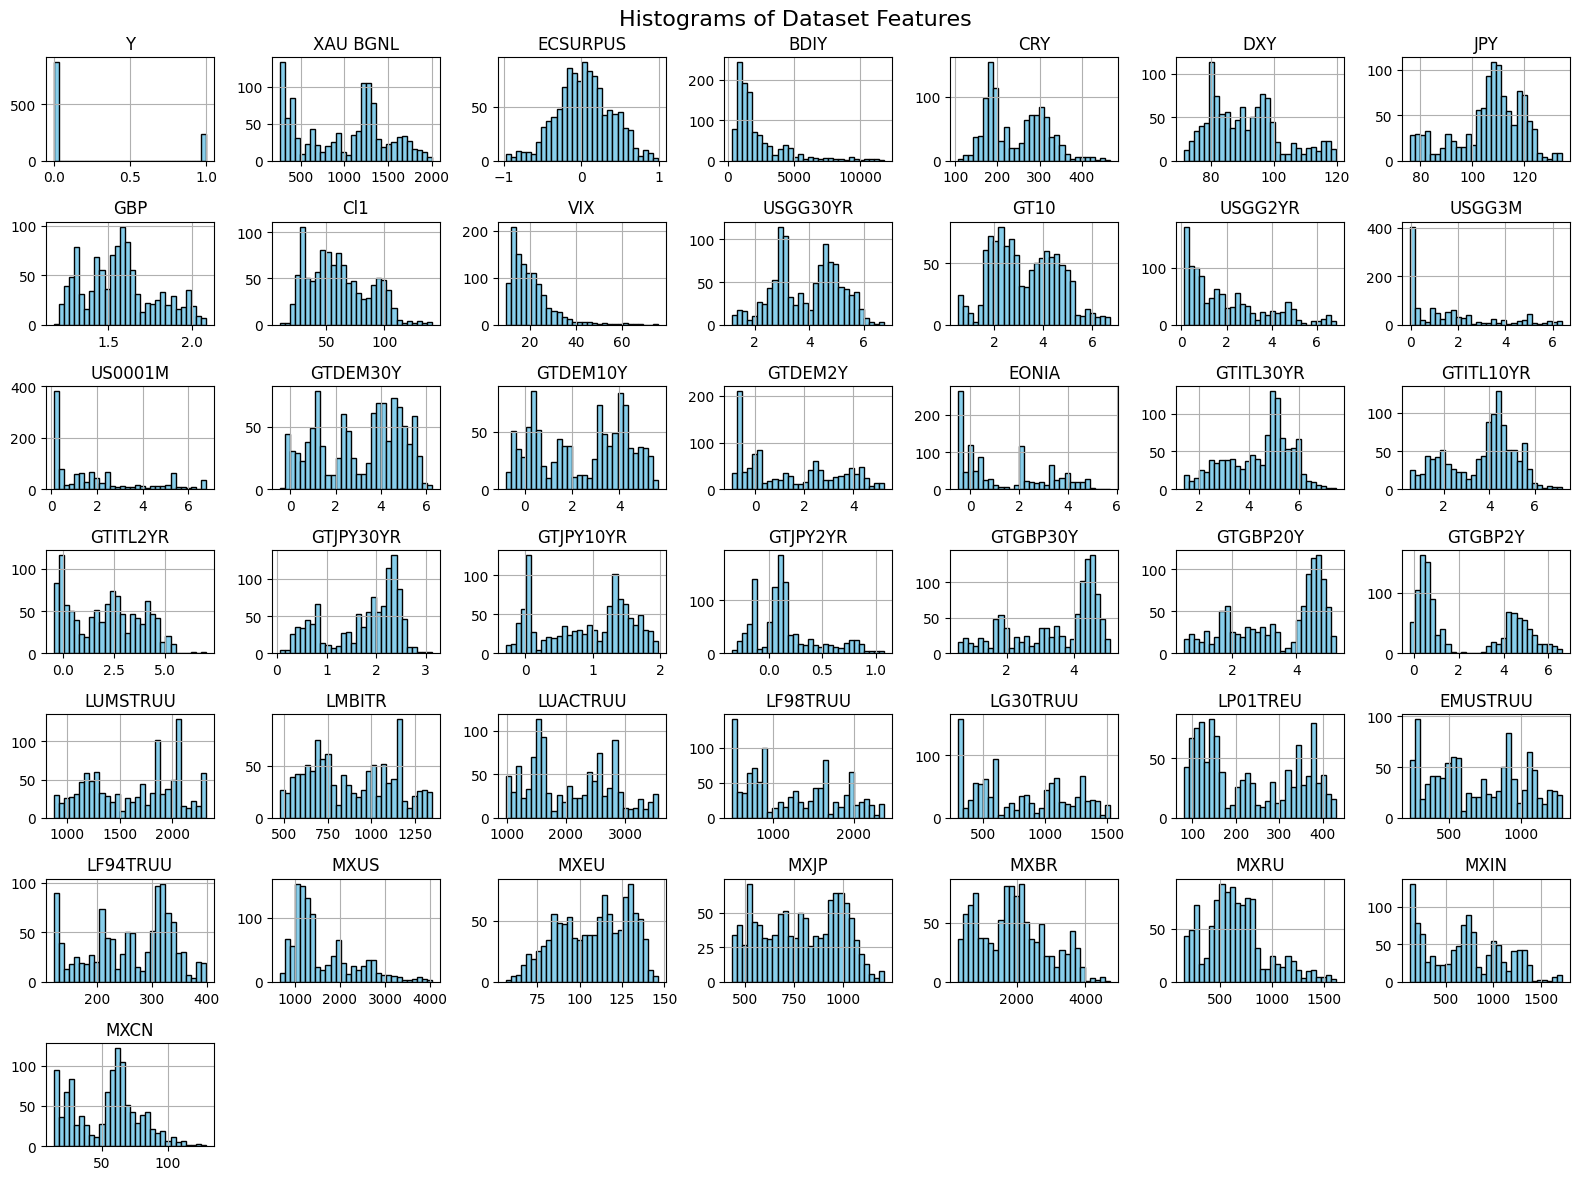

In [17]:
# Plot histograms for all columns
df.hist(figsize=(16, 12), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Dataset Features", fontsize=16)
plt.tight_layout()
plt.show()

### Make some boxplot to show outlier based on 5 important features that you got from chatgpt

In [18]:
# boxplot here, from headstarter

### EDA

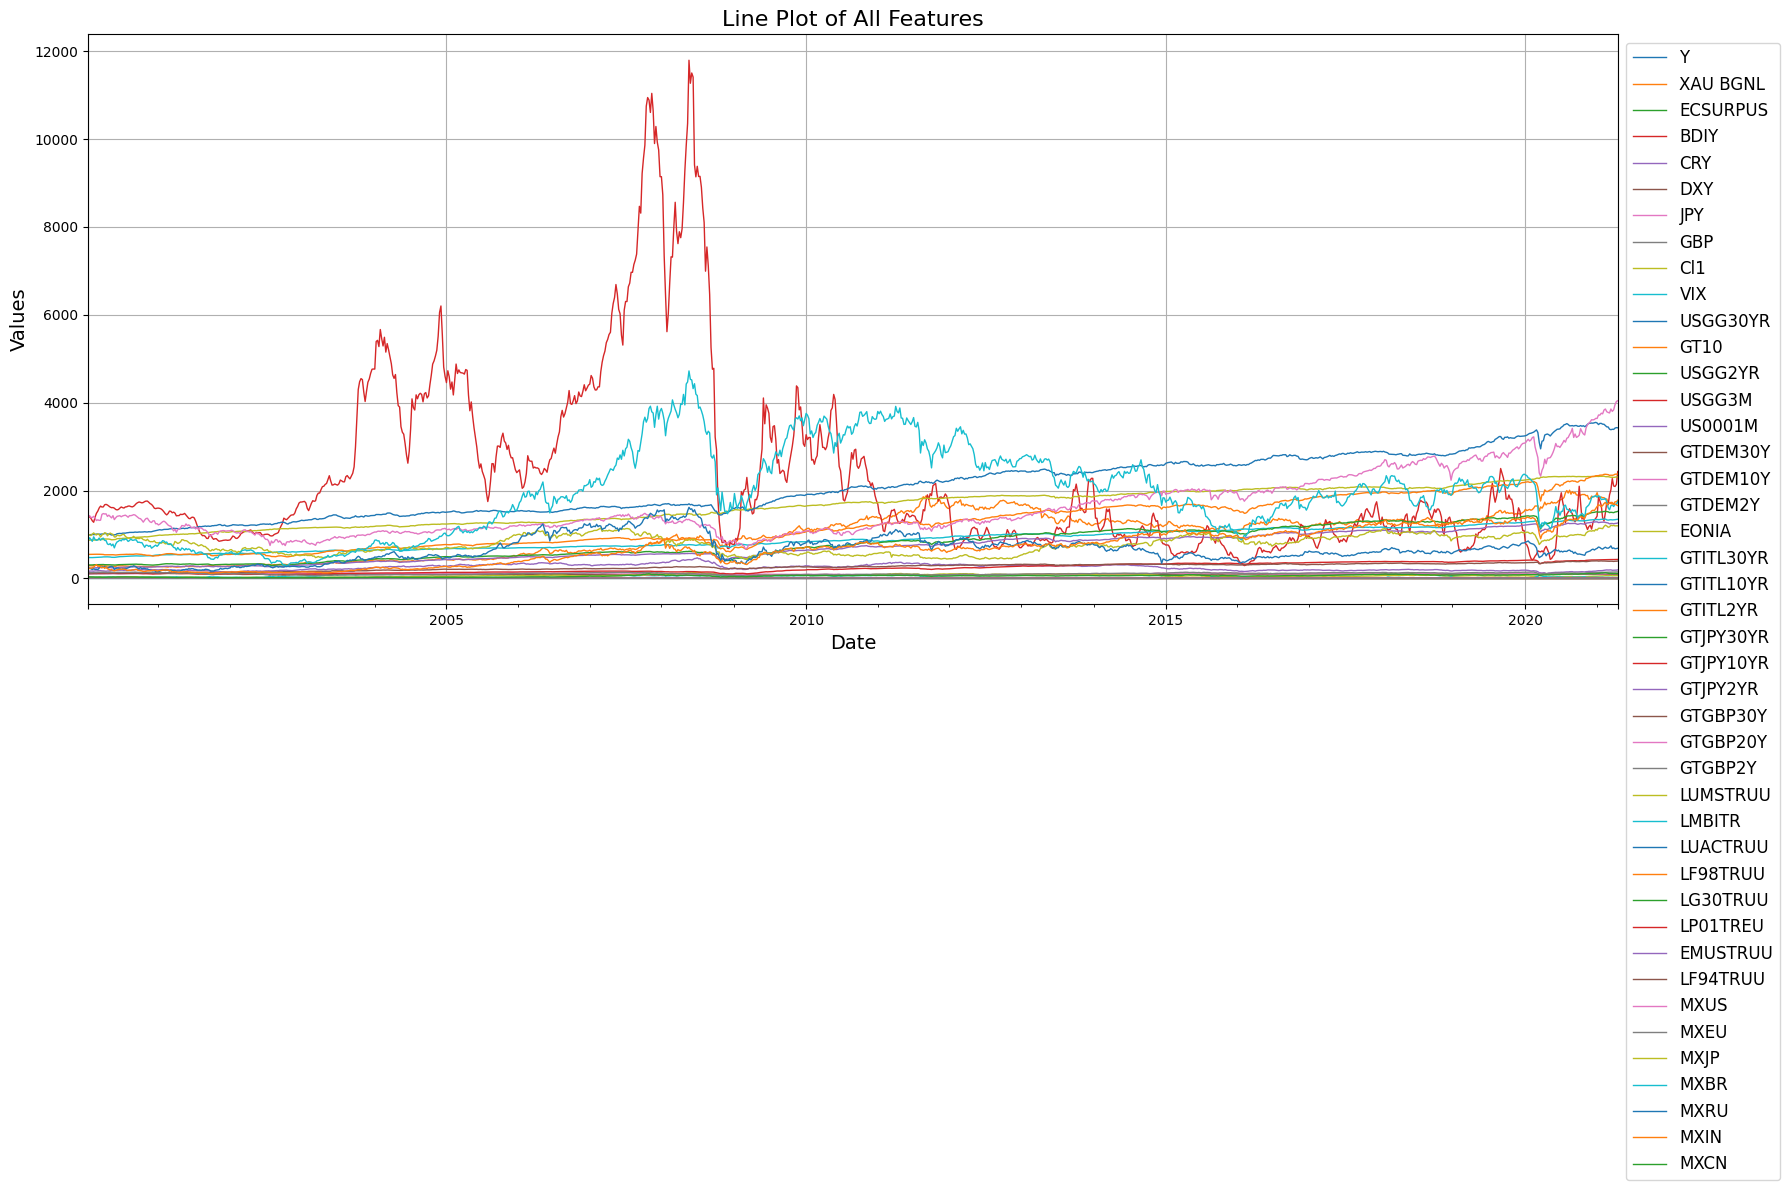

In [19]:
# Line plot for all columns
plt.figure(figsize=(18, 10))
df.plot(ax=plt.gca(), linewidth=1)
plt.title("Line Plot of All Features", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

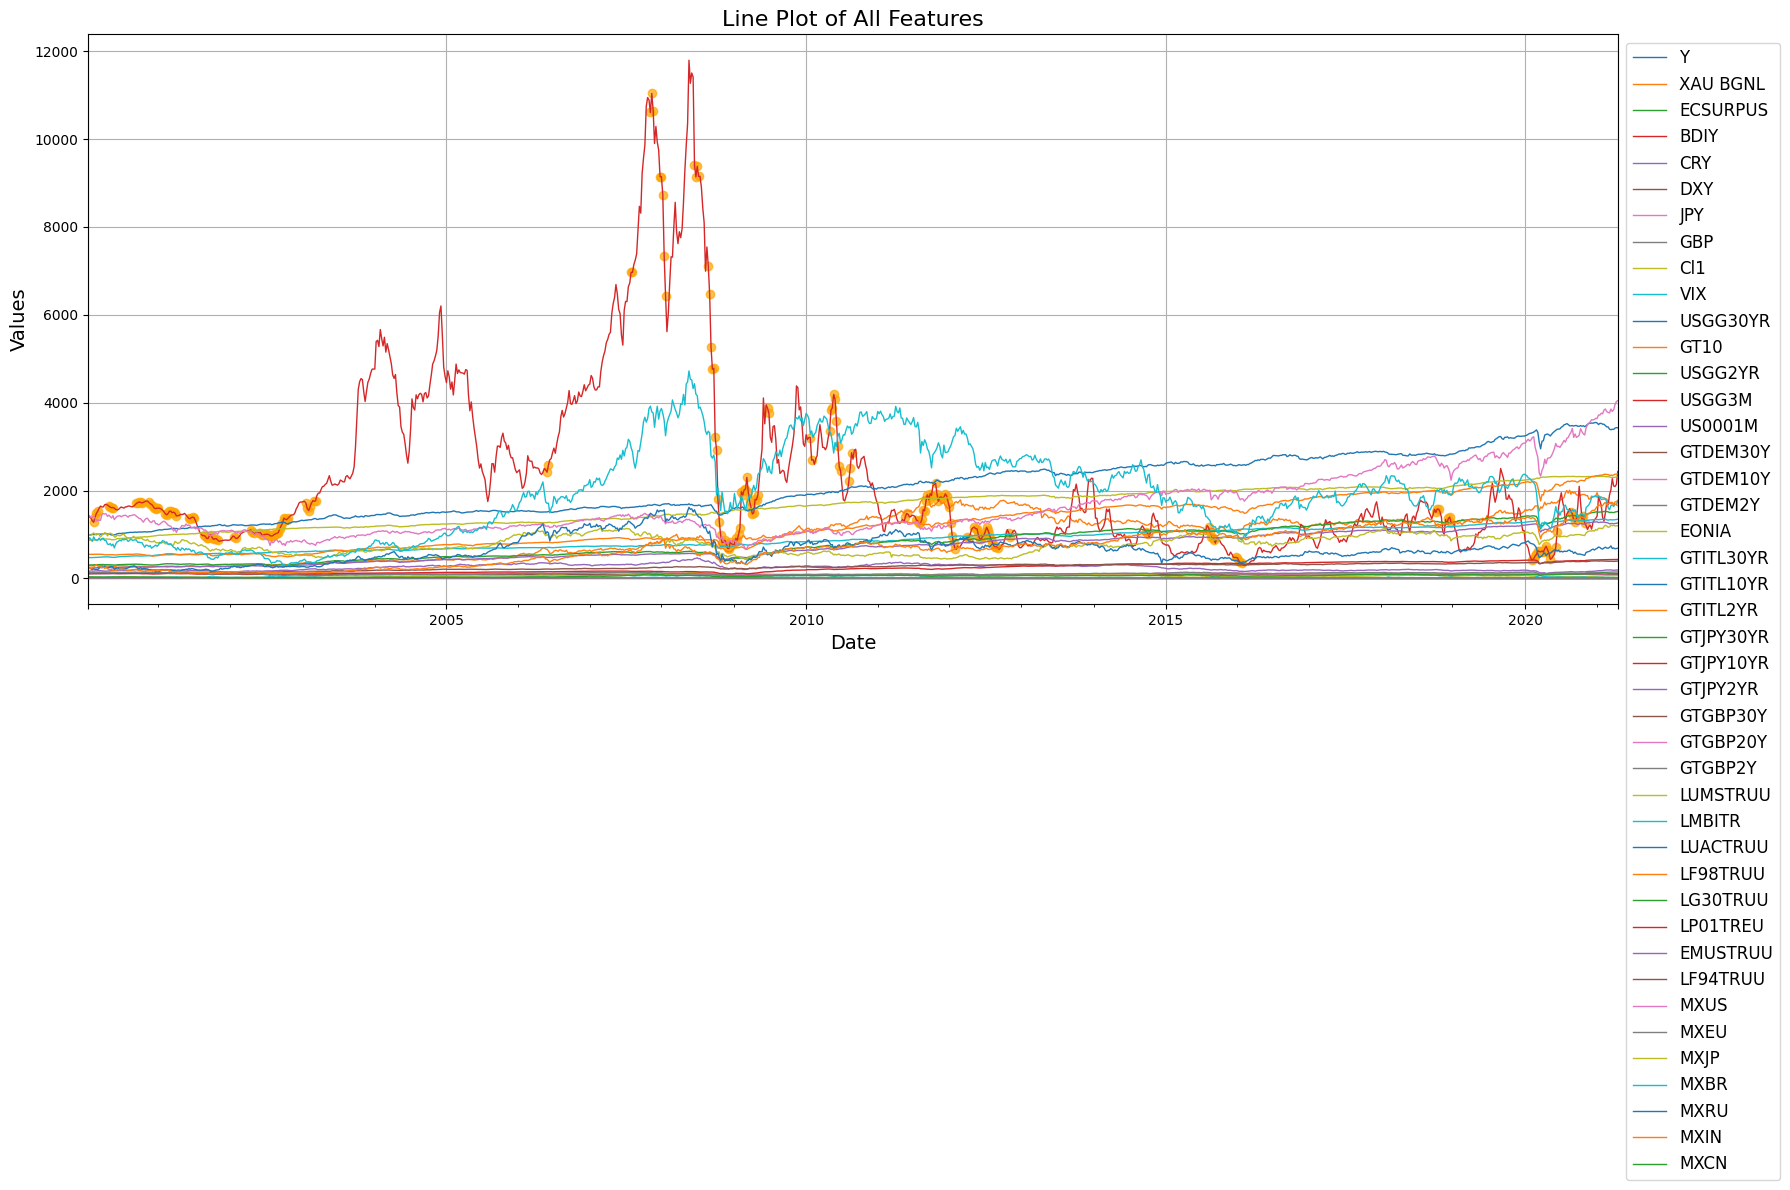

In [20]:
#Line plot and scatterplot to see the anomaly

# Filter the data where Y == 1
df_y1 = df[df['Y'] == 1]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(18, 10))

# Line plot for all columns
df.plot(ax=ax, linewidth=1)
ax.set_title("Line Plot of All Features", fontsize=16)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Values", fontsize=14)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Scatter plot for rows where Y == 1
ax.scatter(df_y1.index, df_y1['BDIY'], label='BDIY (Y==1)', alpha=0.7, c='orange')

# Display grid
ax.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

Based from the line graph above, it is interesting to see, not all the peak data point from feature like BDIY flagged as anomaly. So we can conclude that time series (season) play a big role in what consider as anomaly in the market. In the feature engineering section, we will try to extract the date feature to get more insight.

<Axes: >

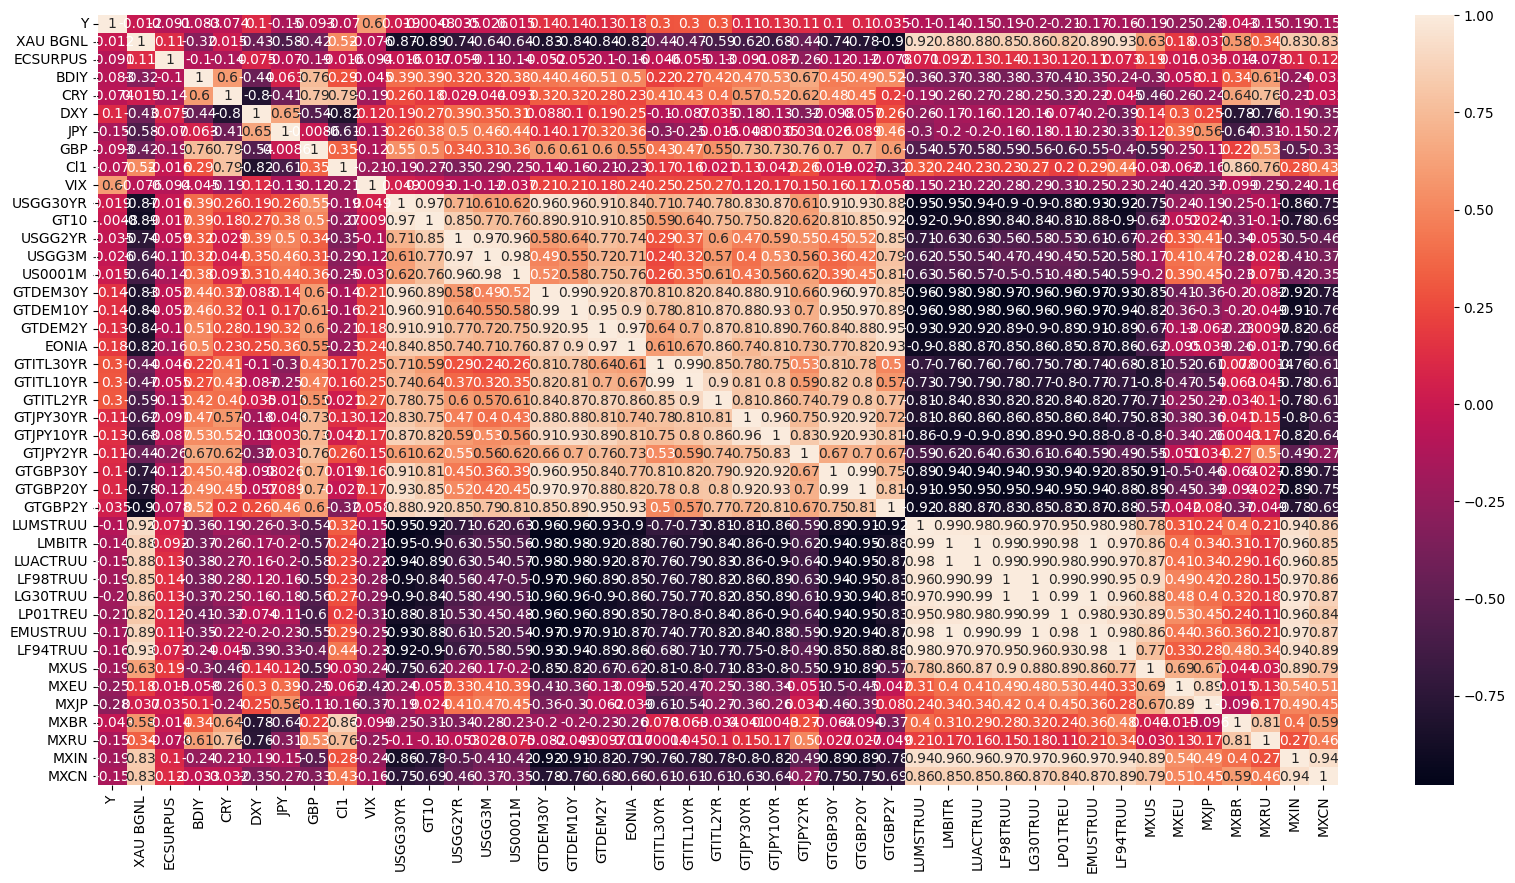

In [21]:
# Too many features too see the correlation clearly, but we can see that there are some correlation that are tightly connected to each other, and that is why we will do PCA 
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot= True)

In [22]:
#even tho, this is unsupervised machine learning, we also want to see the correlation between all these index and the anomaly, to gain more data
df.corr()["Y"].sort_values(ascending = True)

MXJP        -0.279399
MXEU        -0.253877
LP01TREU    -0.209774
LG30TRUU    -0.197232
MXUS        -0.193928
LF98TRUU    -0.189661
MXIN        -0.188942
EMUSTRUU    -0.169475
LF94TRUU    -0.156550
LUACTRUU    -0.153544
JPY         -0.151197
MXCN        -0.149581
MXRU        -0.148848
LMBITR      -0.143607
LUMSTRUU    -0.104897
GBP         -0.093201
ECSURPUS    -0.090772
BDIY        -0.083440
CRY         -0.074102
Cl1         -0.070141
MXBR        -0.043429
USGG2YR     -0.034909
USGG3M      -0.025935
XAU BGNL    -0.011535
GT10        -0.004776
US0001M      0.015379
USGG30YR     0.019255
GTGBP2Y      0.035010
GTGBP30Y     0.099777
GTGBP20Y     0.100142
DXY          0.103227
GTJPY2YR     0.112314
GTJPY30YR    0.114555
GTDEM2Y      0.130607
GTJPY10YR    0.133660
GTDEM10Y     0.139933
GTDEM30Y     0.141537
EONIA        0.180311
GTITL30YR    0.295000
GTITL10YR    0.297573
GTITL2YR     0.304528
VIX          0.598432
Y            1.000000
Name: Y, dtype: float64

#### Based on the data above, it looks like VIX (Votality Index) has the highest positive correlation on the market anomaly. Using this info, we will try to create more feature based on this feature

Info:
- VIX and Market Crashes
- When the market experiences a downturn or crisis (e.g., during the 2008 financial crisis or the COVID-19 market crash), the VIX tends to spike as investors anticipate high levels of volatility.
- Conversely, during periods of market stability or bullish trends, the VIX remains lower, reflecting investor confidence in continued growth.

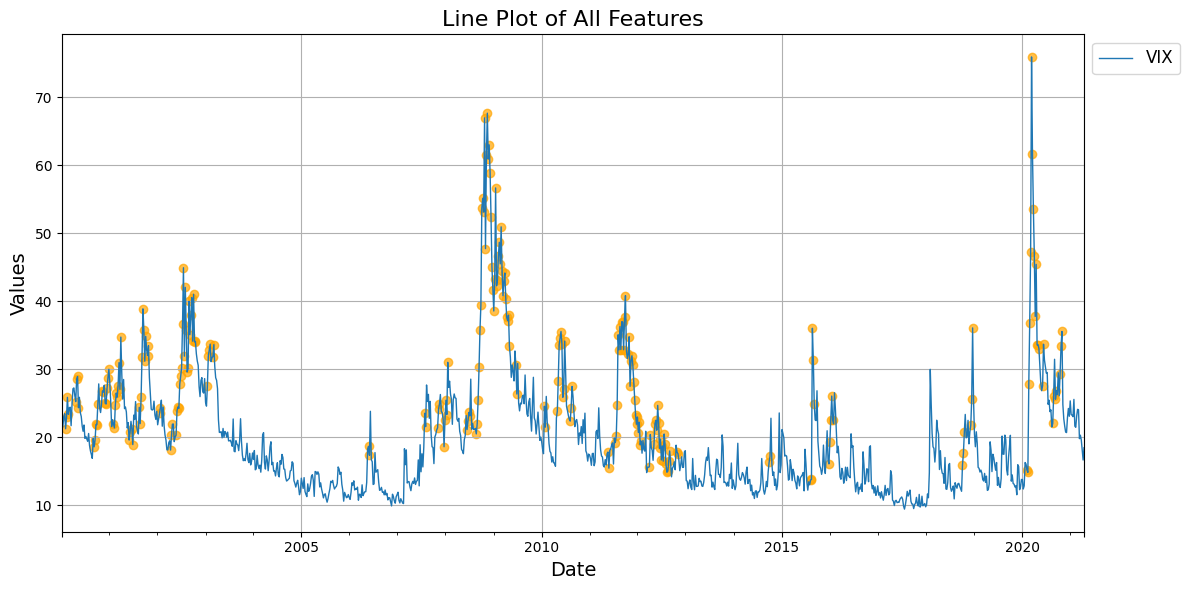

In [23]:
#Line plot and scatterplot to see the anomaly

# Filter the data where Y == 1
df_y1 = df[df['Y'] == 1]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Line plot for all columns
df["VIX"].plot(linewidth=1)
ax.set_title("Line Plot of All Features", fontsize=16)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Values", fontsize=14)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Scatter plot for rows where Y == 1
ax.scatter(df_y1.index, df_y1['VIX'], label='VIX', alpha=0.7, c='orange')

# Display grid
ax.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

Using VIX as our feature and plot it with anomaly data looks better. We can conclude that VIX really correlate to know whether the market is anomaly or not

### Feature Selection - Reduce features with high colinearity

We have total of 42 features and based on the correlation map, we can see lots of data has high correlation to each other. This w means bunch of data gives the similar information. Because of that, we will try to reduce the features

#### Drop Features Using Pearson Correlation

In [24]:
# separate features from target
X = df.drop("Y", axis=1)

In [25]:
def correlation(dataset, threshold):
    col_corr = set() #set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if (corr_matrix.iloc[i,j])> threshold:
                colname = corr_matrix.columns[i] #get the name of the column
                col_corr.add(colname)
    return col_corr
    

In [26]:
corr_features = correlation(X, 0.9)
len(set(corr_features))

24

In [27]:
corr_features

{'EMUSTRUU',
 'EONIA',
 'GT10',
 'GTDEM10Y',
 'GTDEM2Y',
 'GTDEM30Y',
 'GTGBP20Y',
 'GTGBP2Y',
 'GTGBP30Y',
 'GTITL10YR',
 'GTITL2YR',
 'GTJPY10YR',
 'LF94TRUU',
 'LF98TRUU',
 'LG30TRUU',
 'LMBITR',
 'LP01TREU',
 'LUACTRUU',
 'LUMSTRUU',
 'MXCN',
 'MXIN',
 'MXUS',
 'US0001M',
 'USGG3M'}

In [28]:
# i feel like we need this mxus for our data, so i will remove it fromm the set
# Remove 'MXUS' from the set
corr_features.remove('MXUS')

In [29]:
X.drop(corr_features, axis=1, inplace=True)

In [30]:
X.shape

(1111, 19)

Now we only have 19 features left

## Retain these features for recommendations:

- Currency: DXY, JPY, GBP
- Commodities: XAU BGNL, CRY
- Volatility: VIX
- Bonds: USGG30YR, USGG10YR, USGG2YR, GTDEM10Y, GTJPY2YR
- Equities: MXUS, MXEU, MXJP, LUACTRUU, LUMSTRUU, LG30TRUU

### Feature Engineering

In [31]:
#Extract month
X['Month'] = X.index.month
X.head()

,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,USGG2YR,GTITL30YR,GTJPY30YR,GTJPY2YR,MXUS,MXEU,MXJP,MXBR,MXRU,Month
Data,,,,,,,,,,,,,,,,,,,,
2000-01-11,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,22.50,6.671,6.428,6.321,2.422,0.346,1416.12,127.75,990.59,856.76,224.33,1
2000-01-18,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,21.50,6.747,6.465,6.459,2.418,0.349,1428.79,129.50,993.98,925.22,234.37,1
2000-01-25,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,23.02,6.634,6.432,6.281,2.259,0.293,1385.93,126.48,974.83,886.93,216.82,1
2000-02-01,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,23.45,6.423,6.574,6.188,2.330,0.364,1385.31,129.19,1007.12,842.60,201.89,2
2000-02-08,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,21.25,6.231,6.678,6.118,2.481,0.359,1411.95,134.67,1034.58,945.15,218.00,2


In [32]:
# Extract week number from the datetime index
X['Week_Number'] = X.index.isocalendar().week

# Check the first few rows
X.head()

,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,...,GTITL30YR,GTJPY30YR,GTJPY2YR,MXUS,MXEU,MXJP,MXBR,MXRU,Month,Week_Number
Data,,,,,,,,,,,,,,,,,,,,,
2000-01-11,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,22.50,6.671,...,6.321,2.422,0.346,1416.12,127.75,990.59,856.76,224.33,1,2
2000-01-18,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,21.50,6.747,...,6.459,2.418,0.349,1428.79,129.50,993.98,925.22,234.37,1,3
2000-01-25,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,23.02,6.634,...,6.281,2.259,0.293,1385.93,126.48,974.83,886.93,216.82,1,4
2000-02-01,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,23.45,6.423,...,6.188,2.330,0.364,1385.31,129.19,1007.12,842.60,201.89,2,5
2000-02-08,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,21.25,6.231,...,6.118,2.481,0.359,1411.95,134.67,1034.58,945.15,218.00,2,6


In [33]:
#Not going to use this

# # Shift the VIX column by 52 weeks (1 year) and create a new column for the shifted value
# df['VIX_Diff_YoY'] = df['VIX'] - df['VIX'].shift(52)

# # Impute missing values using interpolation, but it turns out that it doesnt work
# # df['VIX_Diff_YoY'] = df['VIX_Diff_YoY'].interpolate(method='time')

# # Impute using mean
# df['VIX_Diff_YoY'] = df['VIX_Diff_YoY'].fillna(df['VIX_Diff_YoY'].mean())



In [34]:
# # Calculate the percentage change between current VIX and shifted VIX (year-over-year change)
# df['VIX_Pct_Change_YoY'] = (df['VIX'] - df['VIX'].shift(52)) / df['VIX'].shift(52) * 100

# # Impute missing values in the percentage change column
# df['VIX_Pct_Change_YoY'] = df['VIX_Pct_Change_YoY'].fillna(df['VIX_Pct_Change_YoY'].mean())


In [35]:
# because VIX has the highest correlation, we will try to create more feature based on VIX, like rolling window (moving average)
X['VIX_rolling_std_4'] = X['VIX'].rolling(window=4).std()  # 4-week rolling std


In [36]:
X.head()

,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,...,GTJPY30YR,GTJPY2YR,MXUS,MXEU,MXJP,MXBR,MXRU,Month,Week_Number,VIX_rolling_std_4
Data,,,,,,,,,,,,,,,,,,,,,
2000-01-11,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,22.50,6.671,...,2.422,0.346,1416.12,127.75,990.59,856.76,224.33,1,2,NaN
2000-01-18,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,21.50,6.747,...,2.418,0.349,1428.79,129.50,993.98,925.22,234.37,1,3,NaN
2000-01-25,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,23.02,6.634,...,2.259,0.293,1385.93,126.48,974.83,886.93,216.82,1,4,NaN
2000-02-01,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,23.45,6.423,...,2.330,0.364,1385.31,129.19,1007.12,842.60,201.89,2,5,0.840174
2000-02-08,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,21.25,6.231,...,2.481,0.359,1411.95,134.67,1034.58,945.15,218.00,2,6,1.092901


In [37]:
X['VIX_rolling_std_4'] = X['VIX_rolling_std_4'].fillna(X['VIX_rolling_std_4'].median())


In [38]:
X.head()

,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,...,GTJPY30YR,GTJPY2YR,MXUS,MXEU,MXJP,MXBR,MXRU,Month,Week_Number,VIX_rolling_std_4
Data,,,,,,,,,,,,,,,,,,,,,
2000-01-11,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,22.50,6.671,...,2.422,0.346,1416.12,127.75,990.59,856.76,224.33,1,2,1.467613
2000-01-18,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,21.50,6.747,...,2.418,0.349,1428.79,129.50,993.98,925.22,234.37,1,3,1.467613
2000-01-25,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,23.02,6.634,...,2.259,0.293,1385.93,126.48,974.83,886.93,216.82,1,4,1.467613
2000-02-01,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,23.45,6.423,...,2.330,0.364,1385.31,129.19,1007.12,842.60,201.89,2,5,0.840174
2000-02-08,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,21.25,6.231,...,2.481,0.359,1411.95,134.67,1034.58,945.15,218.00,2,6,1.092901


### Standarized Features

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled =scaler.fit_transform(X)

### PCA(Dimension Reduction)

attempt to try to reduce moe features using PCA

In [40]:
from sklearn.decomposition import PCA

In [41]:
#apply PCA
pca = PCA()
pca.fit(X_scaled)

PCA()

In [42]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

In [43]:
explained_variance

array([0.29958552, 0.232233  , 0.1507195 , 0.09024478, 0.06931162,
       0.04512652, 0.03664173, 0.01733452, 0.01259025, 0.01099253,
       0.00740492, 0.00649657, 0.00530527, 0.00384686, 0.00299595,
       0.00262084, 0.00185649, 0.00148939, 0.00133576, 0.00082911,
       0.00062411, 0.00041477])

In [44]:
# Explained variance ratio but in cumulative sum, so it is easier
cumulative_variance = explained_variance.cumsum()
cumulative_variance

array([0.29958552, 0.53181852, 0.68253802, 0.7727828 , 0.84209442,
       0.88722094, 0.92386266, 0.94119719, 0.95378744, 0.96477997,
       0.97218489, 0.97868146, 0.98398672, 0.98783358, 0.99082953,
       0.99345037, 0.99530686, 0.99679625, 0.99813201, 0.99896112,
       0.99958523, 1.        ])

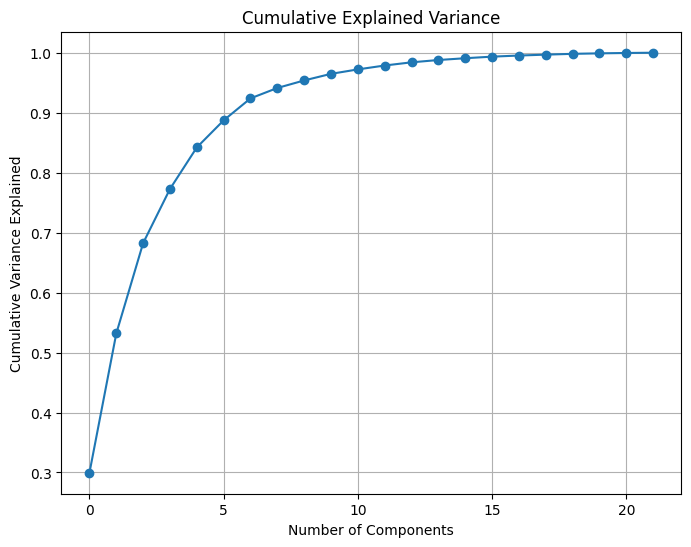

In [45]:
# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid()
plt.show()

From the data above, we see that to retain 95% of variance, we only need around 9 components

In [46]:
# Retain 95% of variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [47]:
X_pca.shape

(1111, 9)

In [48]:
pca.explained_variance_ratio_

array([0.29958552, 0.232233  , 0.1507195 , 0.09024478, 0.06931162,
       0.04512652, 0.03664173, 0.01733452, 0.01259025])

In [49]:
#access pca components
components = pca.components_
components

array([[-1.43689582e-01, -6.94699343e-02,  2.65066848e-01,
         3.33295996e-01, -2.24416643e-01, -1.11967320e-01,
         3.39192109e-01,  1.90603604e-01,  1.99177133e-02,
         2.46699110e-01,  1.06316771e-01,  2.82126648e-01,
         3.32448302e-01,  3.16030709e-01, -3.03160258e-01,
        -1.73434055e-01, -1.55520685e-01,  1.59777973e-01,
         2.05384927e-01,  1.00662150e-02,  1.09198753e-02,
        -4.73514410e-02],
       [ 3.95648524e-01,  2.25726985e-02,  1.24480505e-02,
         1.79789544e-01, -3.31317404e-01, -2.92345943e-01,
        -2.35771872e-02,  3.47675473e-01, -8.27066211e-02,
        -3.10042776e-01, -3.03280590e-01, -1.35057264e-01,
        -1.71999861e-01, -7.74390679e-02,  1.80792797e-01,
         2.27504608e-02, -1.52183056e-02,  3.60697909e-01,
         2.85306079e-01,  7.15358689e-03,  6.76347424e-03,
         2.61115954e-04],
       [-6.27731292e-02, -2.13745853e-02,  2.30021258e-01,
         8.43631933e-02,  5.48157015e-03,  2.70673351e-01,
    

In [50]:
loading_df = pd.DataFrame(components, columns=X.columns, index=[f'PC{i+1}' for i in range(components.shape[0])])
loading_df

,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,...,GTJPY30YR,GTJPY2YR,MXUS,MXEU,MXJP,MXBR,MXRU,Month,Week_Number,VIX_rolling_std_4
PC1,-0.143690,-0.069470,0.265067,0.333296,-0.224417,-0.111967,0.339192,0.190604,0.019918,0.246699,...,0.332448,0.316031,-0.303160,-0.173434,-0.155521,0.159778,0.205385,0.010066,0.010920,-0.047351
PC2,0.395649,0.022573,0.012448,0.179790,-0.331317,-0.292346,-0.023577,0.347675,-0.082707,-0.310043,...,-0.172000,-0.077439,0.180793,0.022750,-0.015218,0.360698,0.285306,0.007154,0.006763,0.000261
PC3,-0.062773,-0.021375,0.230021,0.084363,0.005482,0.270673,0.150895,0.042403,-0.332257,0.035538,...,-0.026876,0.167199,0.212180,0.431972,0.474710,0.050635,0.243466,-0.045569,-0.042299,-0.221721
PC4,-0.005433,-0.108199,0.080944,-0.017019,0.001080,0.038550,0.010428,-0.014643,0.039507,-0.045530,...,-0.002239,0.045375,0.028928,0.016200,0.038808,-0.021640,0.007075,0.694837,0.694865,0.039393
PC5,0.028680,-0.259589,0.175663,-0.047412,-0.014018,0.095213,0.028160,-0.066710,0.546645,-0.102929,...,-0.050900,0.257963,0.080600,0.079193,0.170383,0.068297,0.131770,-0.091636,-0.092178,0.639753
PC6,0.054164,0.856073,0.041559,-0.052205,0.078190,-0.138236,-0.120271,0.057190,0.155107,0.142366,...,0.097377,0.053433,0.113489,0.119743,0.100195,0.131881,0.048760,0.061551,0.067031,0.191486
PC7,-0.141506,0.354328,0.403578,0.039942,-0.206393,0.281105,0.305132,-0.171099,-0.033087,-0.087367,...,-0.106135,-0.177109,-0.004981,-0.369104,-0.046105,-0.212712,0.042702,-0.016781,-0.021488,0.067354
PC8,-0.007828,0.065739,-0.520399,0.285251,-0.080888,0.155190,0.218944,0.216272,-0.351613,-0.010655,...,0.150413,-0.076628,-0.097523,0.074061,0.064583,-0.218813,-0.063799,0.027085,0.023899,0.536353
PC9,-0.067291,-0.000075,0.079799,0.003149,0.350386,0.602369,-0.246080,0.305965,-0.041551,0.135683,...,-0.054810,-0.111152,-0.145431,0.014008,-0.135696,0.318153,0.201485,0.005067,0.011342,0.074688


Turns out, if i use PCA, SHAP wont be able to interpret the data, and can only explain the PCA components and not the original feature that can make the anomaly. So, we will try using VIF

## Training the model

Lets try to train the model with 2 methods:
- Unsupervised: isolation forest
- Supervised: decision trees
- ADTK

### 1.Unsupervised

#### 1.1. Isolation Forest without PCA

In [51]:
from sklearn.ensemble import IsolationForest


In [52]:
#we expect contamination around 20%
# iso_forest = IsolationForest(contamination=0.2, random_state=42)
iso_forest = IsolationForest(random_state=42)

y_pred_iso = iso_forest.fit_predict(X_scaled)


In [53]:
df["y_pred_iso"] = y_pred_iso

In [54]:
df["y_pred_iso"].value_counts()

y_pred_iso
 1    902
-1    209
Name: count, dtype: int64

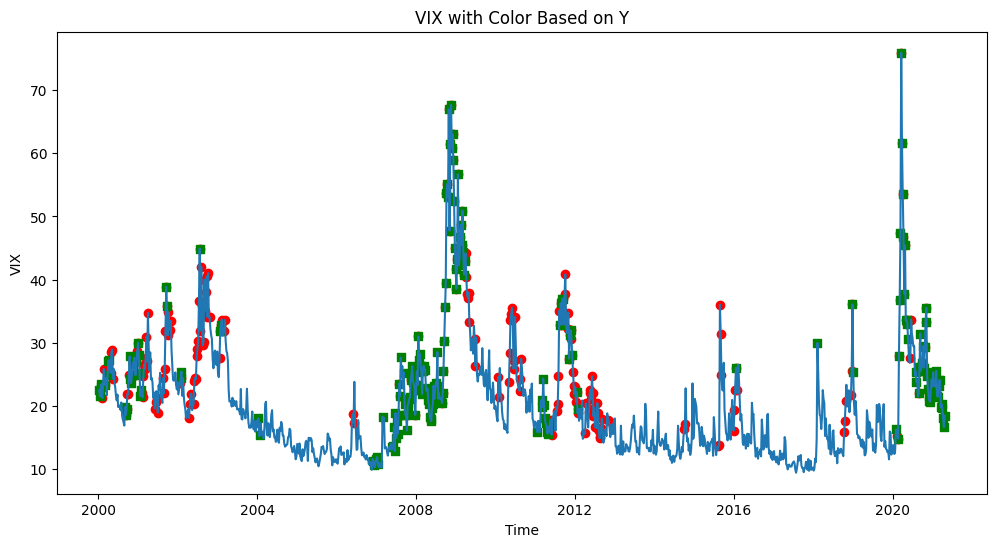

In [55]:
#Figure: Trying to plot the isolation forest prediction with the flagged anomaly
df_y1 = df[df['Y'] == 1]
df_ypred1  = df[df['y_pred_iso'] == -1]

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["VIX"])

# Scatter for actual data (df_y1)
plt.scatter(df_y1.index, df_y1["VIX"], c='red', marker='o', label='Actual Data (Y)')
 
# Scatter for predicted data (df_ypred1)
plt.scatter(df_ypred1.index, df_ypred1["VIX"], c='green', marker='s', label='Predicted Data (y_pred)')


plt.title("VIX with Color Based on Y")
plt.xlabel("Time")
plt.ylabel("VIX")
plt.show()

In [56]:
# add isolation forest prediction to the dataframe
df["y_pred_iso"] = np.where(df["y_pred_iso"]== -1, 1,0)
y_pred_iso = np.where(y_pred_iso == -1, 1, 0)


In [57]:
y_pred_iso

array([1, 1, 1, ..., 1, 1, 1])

In [58]:
df.head()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN,y_pred_iso
Data,,,,,,,,,,,,,,,,,,,,,
2000-01-11,0,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,22.50,...,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30,1
2000-01-18,0,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,21.50,...,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74,1
2000-01-25,0,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,23.02,...,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46,1
2000-02-01,0,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,23.45,...,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29,1
2000-02-08,1,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,21.25,...,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32,0


In [60]:
# Create classification report 
from sklearn.metrics import classification_report

In [61]:
report_iso = classification_report(df["Y"], y_pred_iso, target_names=["Normal", "Anomaly"])
print(report_iso)

              precision    recall  f1-score   support

      Normal       0.84      0.87      0.85       874
     Anomaly       0.44      0.39      0.41       237

    accuracy                           0.76      1111
   macro avg       0.64      0.63      0.63      1111
weighted avg       0.75      0.76      0.76      1111



The recall score for anomaly doesnt look good with only 39% of ability to correctly predict the anomaly

#### 1.2. Isolation Forest with PCA

In [62]:
iso_forest_pca = IsolationForest(random_state=42)

In [63]:
y_pred_iso_pca = iso_forest_pca.fit_predict(X_pca)

In [64]:
y_pred_iso_pca = np.where(y_pred_iso_pca== -1, 1,0)

In [65]:
report_iso_pca = classification_report(df["Y"], y_pred_iso_pca, target_names=["Normal", "Anomaly"])
print(report_iso_pca)

              precision    recall  f1-score   support

      Normal       0.83      0.91      0.87       874
     Anomaly       0.48      0.31      0.38       237

    accuracy                           0.78      1111
   macro avg       0.65      0.61      0.62      1111
weighted avg       0.75      0.78      0.76      1111



Interesting, after applying PCA to the data, it performed even worse than before

#### 1.3  LocalOutlierFactor


In [66]:
from sklearn.neighbors import LocalOutlierFactor

In [67]:
lof = LocalOutlierFactor()

In [68]:
y_pred_lof = lof.fit_predict(X_scaled)

In [69]:
df["y_pred_lof"] = y_pred_lof

In [70]:
df["y_pred_lof"].value_counts()

y_pred_lof
 1    1096
-1      15
Name: count, dtype: int64

In [71]:
lof.get_params()

{'algorithm': 'auto',
 'contamination': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 20,
 'novelty': False,
 'p': 2}

setting the contamination to as auto, give a bad prediction to our model, because even based on the value counts, it could only predict 15 data points as outlier. Lets change some of the param

In [72]:
lof = LocalOutlierFactor(contamination= 0.2)

In [73]:
y_pred_lof = lof.fit_predict(X_scaled)
df["y_pred_lof"] = y_pred_lof
df["y_pred_lof"].value_counts()

y_pred_lof
 1    889
-1    222
Name: count, dtype: int64

In [74]:
y_pred_lof = np.where(y_pred_lof == -1, 1, 0)

In [75]:
report_lof = classification_report(df["Y"], y_pred_lof, target_names=["Normal", "Anomaly"])
print(report_lof)

              precision    recall  f1-score   support

      Normal       0.84      0.86      0.85       874
     Anomaly       0.44      0.41      0.42       237

    accuracy                           0.76      1111
   macro avg       0.64      0.63      0.64      1111
weighted avg       0.76      0.76      0.76      1111



The prediction looks really similar to isolation forest

#### 1.4 One Class SVM

In [76]:
from sklearn.svm import OneClassSVM


In [77]:
oc_svm = OneClassSVM()

In [78]:
y_pred_svm = oc_svm.fit_predict(X_scaled)

In [79]:
oc_svm.get_params()

{'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'nu': 0.5,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

The nu is really big, lets reduce it to 0.2, so it can better predict our model

In [80]:
oc_svm = OneClassSVM(nu=0.2)

In [81]:
y_pred_svm = oc_svm.fit_predict(X_scaled)

In [82]:
y_pred_svm = np.where(y_pred_svm == -1, 1, 0)

In [83]:
df["y_pred_svm"] = y_pred_svm
df["y_pred_svm"].value_counts()

y_pred_svm
0    889
1    222
Name: count, dtype: int64

In [84]:
report_svm = classification_report(df["Y"], y_pred_svm, target_names=["Normal", "Anomaly"])
print(report_svm)

              precision    recall  f1-score   support

      Normal       0.84      0.85      0.84       874
     Anomaly       0.41      0.39      0.40       237

    accuracy                           0.75      1111
   macro avg       0.63      0.62      0.62      1111
weighted avg       0.75      0.75      0.75      1111



It is interesting to see that all 3 unsupervised data that we use ended up giving similar recall score. It is maybe because, if we see from the earlier graph, not all data that looks like out of range / outlier was flagges as anomaly. That is why the unsupervised machine learning find it difficult to know which one is anomaly without any superised learning before

### 2. ADTK

In [85]:
# libraries that can be used to detect anomaly

### Supervised

#### Train Test Split data
Because the data is time series data, we will split data differently

In [86]:
# Define split ratio
train_size = int(len(df) * 0.8)  # 80% train, 20% test

In [87]:
train_size

888

In [88]:
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [89]:
#scale the data
scaler2 = StandardScaler()
X_train = scaler2.fit_transform(X_train)
X_test = scaler2.transform(X_test)

#### 1.1 Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier


In [91]:
dt = DecisionTreeClassifier(random_state=42)

#fit to train data
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

In [92]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [93]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       194
           1       0.38      0.62      0.47        29

    accuracy                           0.82       223
   macro avg       0.66      0.74      0.68       223
weighted avg       0.87      0.82      0.84       223



The recall improve so much to 0.62, but the precision become worse

In [94]:
# Create a DataFrame with feature importances
feature_importances = pd.DataFrame({
    "features": X.columns,  # Use the feature names
    "feature_importances": dt.feature_importances_  # Corresponding importance values
})

# Sort features by importance (optional)
feature_importances = feature_importances.sort_values(by="feature_importances", ascending=False)

feature_importances

,features,feature_importances
8,VIX,0.371383
11,GTITL30YR,0.135549
16,MXJP,0.086024
15,MXEU,0.067103
17,MXBR,0.041236
1,ECSURPUS,0.031651
18,MXRU,0.029719
9,USGG30YR,0.027008
7,Cl1,0.025781
4,DXY,0.021705


It is interesting to see that gold index did not have feature importances at all to the prediction. It also show that month and week number did not have big contribution to the anomaly prediction

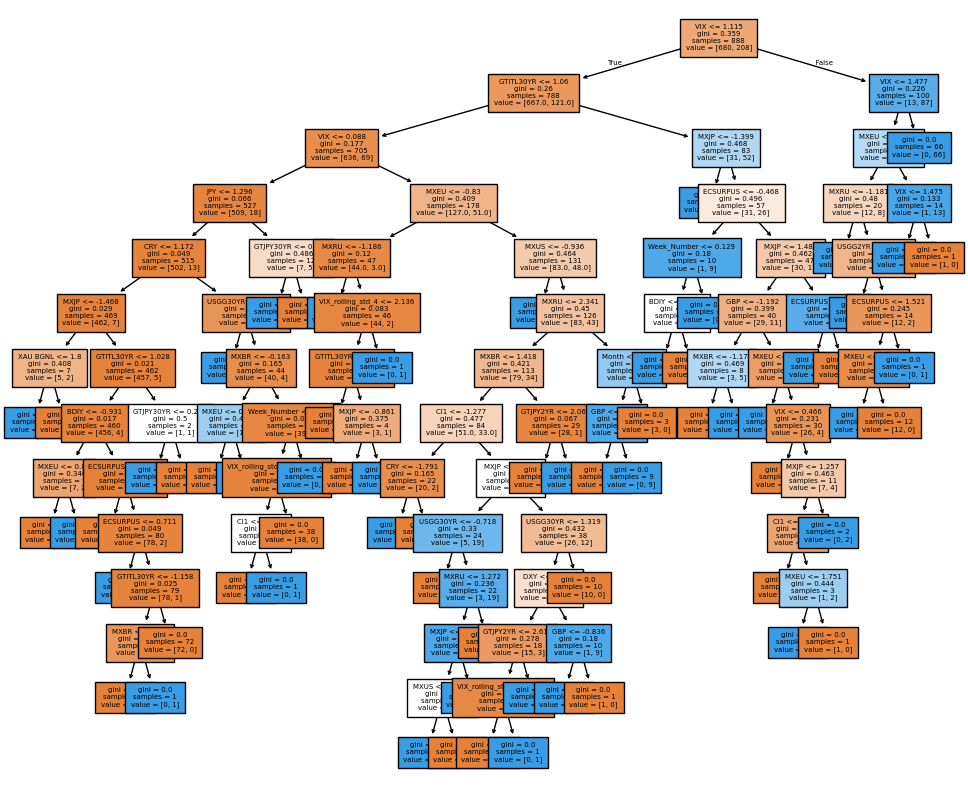

In [95]:
from sklearn.tree import plot_tree

plt.figure(figsize=[12,10])
plot_tree(dt,feature_names=X.columns, filled=True, fontsize=5)
plt.show()

From the plot, we can see, one of the most poweful feature to know whether data is anomaly or not is started by splitting the VIX

In [96]:
#Hyperparameter tuning, to see if we can get better results
from sklearn.model_selection import GridSearchCV

In [97]:
param_grid = {
    'criterion': ['gini', 'entropy'],  # Metric to evaluate split quality
    'max_depth': [3, 5, 10, None],     # Maximum tree depth
    'min_samples_split': [2, 5, 10],   # Min samples to split an internal node
    'min_samples_leaf': [1, 2, 4],     # Min samples at a leaf node
    'max_features': [None, 'sqrt', 'log2']  # Max features to consider for best split
}

In [98]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [99]:
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [100]:
# Evaluate on test set
best_model_dt = grid_search.best_estimator_
y_pred_dt_tune = best_model_dt.predict(X_test)


In [101]:
print(classification_report(y_test, y_pred_dt_tune))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       194
           1       1.00      0.52      0.68        29

    accuracy                           0.94       223
   macro avg       0.97      0.76      0.82       223
weighted avg       0.94      0.94      0.93       223



Interesting to see that precision go up so much, but recall got compromised

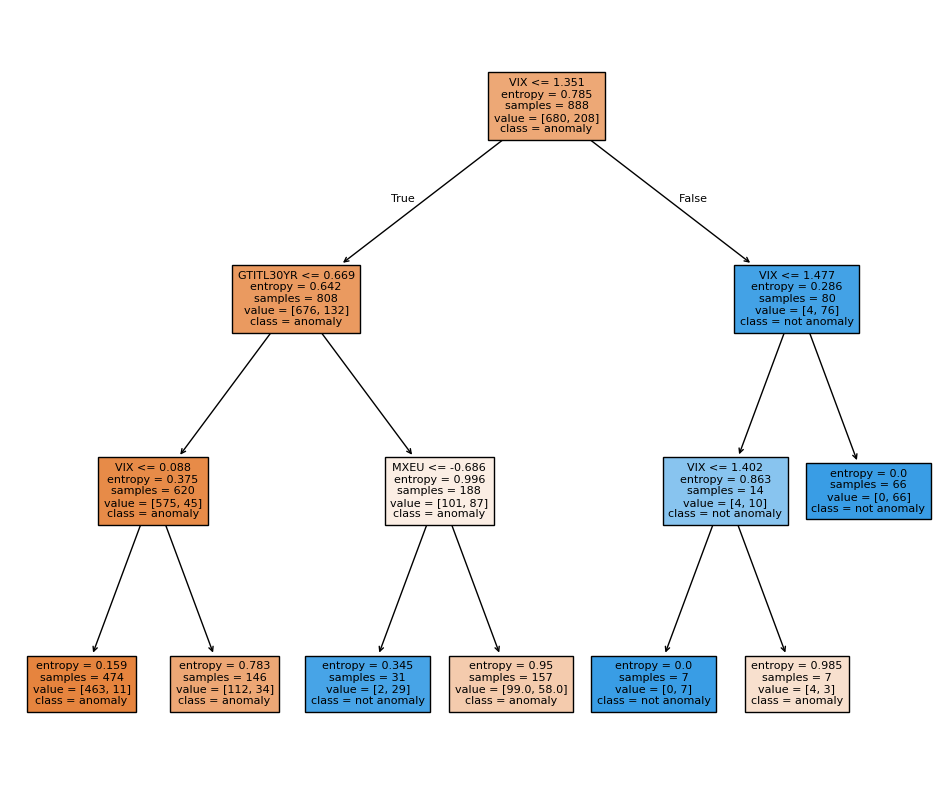

In [102]:
#plot the tree

plt.figure(figsize=[12,10])
plot_tree(best_model_dt,feature_names=X.columns, filled=True, fontsize=8, class_names=["anomaly", "not anomaly"])
plt.show()

### 2.2 XGboost

In [103]:
!pip install xgboost

In [104]:
from xgboost.sklearn import XGBClassifier

In [105]:
# Create and train the model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred_xgb))

/home/gio/venvs/llm/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:32:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.93      0.99      0.96       194
           1       0.88      0.48      0.62        29

    accuracy                           0.92       223
   macro avg       0.90      0.74      0.79       223
weighted avg       0.92      0.92      0.91       223



In [106]:
# Plot feature importance
xgb.feature_importances_

array([0.05076076, 0.0191072 , 0.03145388, 0.02594194, 0.04153102,
       0.04682627, 0.01766508, 0.02823466, 0.23295736, 0.04083971,
       0.02792934, 0.13034646, 0.02563142, 0.03563166, 0.01420372,
       0.04627655, 0.02774028, 0.01570966, 0.04046595, 0.04036724,
       0.02842582, 0.03195389], dtype=float32)

In [108]:
# Create a DataFrame with feature importances
feature_importances_xgb = pd.DataFrame({
    "features": X.columns,  # Use the feature names
    "feature_importances": xgb.feature_importances_  # Corresponding importance values
})

# Sort features by importance (optional)
feature_importances_xgb = feature_importances_xgb.sort_values(by="feature_importances", ascending=False)

feature_importances_xgb

,features,feature_importances
8,VIX,0.232957
11,GTITL30YR,0.130346
0,XAU BGNL,0.050761
5,JPY,0.046826
15,MXEU,0.046277
4,DXY,0.041531
9,USGG30YR,0.040840
18,MXRU,0.040466
19,Month,0.040367
13,GTJPY2YR,0.035632


Feature importances look pretty similar, with VIX having the highest feature importances. But uniquely the month and week number as date indicator got higher feature importance according to xgb model

#### 2.3 Random Forest Classifier

In [111]:
from sklearn.ensemble import RandomForestClassifier


In [121]:
# Create and train the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       194
           1       0.83      0.52      0.64        29

    accuracy                           0.92       223
   macro avg       0.88      0.75      0.80       223
weighted avg       0.92      0.92      0.92       223



In [122]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [117]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                       param_grid=param_grid_rf, cv=3, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best Parameters:", grid_rf.best_params_)
print("Best Accuracy:", grid_rf.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best Accuracy: 0.6779279279279279


In [118]:
# Evaluate on test set
best_model_rf = grid_rf.best_estimator_
y_pred_rf_tune = best_model_rf.predict(X_test)

In [119]:
print(classification_report(y_test, y_pred_rf_tune))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       194
           1       0.83      0.52      0.64        29

    accuracy                           0.92       223
   macro avg       0.88      0.75      0.80       223
weighted avg       0.92      0.92      0.92       223



### Classification Report

In [ ]:
# Create classification report 
from sklearn.metrics import classification_report

In [ ]:
pred_list = [df["y_pred"], df["y_pred_pca"]]

In [ ]:
def print_classification_report(pred_list):
    for i in pred_list:
        report = classification_report(df["Y"], i, target_names=["Normal", "Anomaly"])
        print(report)
        print("------------------------------------------------\n")

In [ ]:
print_classification_report(pred_list)

In [ ]:
report = classification_report(df["Y"], df["y_pred"], target_names=["Normal", "Anomaly"])
print(report)

In [ ]:
df["anomaly_score"] = iso_forest.decision_function(X_scaled)

### Trial

In [ ]:
scores = iso_forest.score_samples(X_scaled)


In [ ]:
scores.shape

### [I HAVE NO IDEA] Create SHAP here

In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
#shap KernelExplainer better for model like SVM, isolation, and KNN


In [ ]:
# Create a TreeExplainer for tree-based models
# explainer = shap.KernelExplainer(iso_forest.decision_function, X_scaled)
explainer = shap.KernelExplainer(iso_forest.predict, df[cols].to_numpy())


In [ ]:
# calculate the shap value
data = df[cols].to_numpy()
shap_values = explainer(data)


In [ ]:
shap_values = explainer.shap_values(data)


In [ ]:
shap.summary_plot(shap_values, data, feature_names=cols)

In [ ]:
explainer.expected_value

In [ ]:
shap_values.sum(1).argmin()

In [ ]:
shap_values[12]

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[12], data[12], feature_names = cols)

In [ ]:
shap_values[135]

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[135], data[135], feature_names = cols)

In [ ]:
explainer.expected_value

In [ ]:
shap_values_for_instance = shap_values[0]  # For the first instance in X_scaled
print(sum(shap_values_for_instance))

In [ ]:
iso_forest.predict_proba(X_scaled[0])

In [ ]:
shap.summary_plot(shap_values, X_scaled, feature_names= df.c)

In [ ]:
X.columns

In [ ]:
np.abs(shap_values).mean(axis=0)

In [ ]:
sum(np.abs(shap_values).mean(axis=0))

# Conclusion

#### Recall score with isolation forest around 40%, it means the model is not good at predicting anomalies
- Try splitting the data so we can try to use hyperparameter tuning for isolation forest so we can have better recall score. Split the data manually instead of train_test_split


#### Need to do
- Redo SHAP
- Add more models like DBScan and onesvm
- Create UI
- Explore more feature engineering
- Do feature reduction

# Lesson Learned
- Try using PCA to reduce multicolinearity, but it makes hard to explain how each feature contribute to the prediction

### Create confusion matrix over here

## Other steps

Project Requirements:

Milestone 1: Develop an anomaly detection model using either this provided dataset or your own to classify market crashes. This is a binary output: crash or no crash. Perform statistical research to select and implement the most effective machine learning model for the task, such as logistic regression, neural networks, etc.


Milestone 2: Enhance the system by proposing a data-driven investment strategy based on the model’s predictions, focusing on minimizing losses or maximizing returns.


Milestone 3: Design and integrate an AI-driven bot to explain the investment strategy to end users, making it accessible and actionable.


Others:

- Use more model to create it, DBSCAN, neural networks
- Create UI for it, that predict crash or no crash
- 

## Priorities:
- Make SHAP first to explain isolation forest
- Plan to create the UI using streamlit
- Plan to use PHIDATA or CrewAI for agent

In [ ]:
df.columns